# Sampling and Distributions

Based on: https://github.com/cs109/2015lab3/blob/master/Lab3-Stats.ipynb

Good stats refresher

In [51]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Expectations and Variance:

Variance for a dataset is the expected values of the squared differences betweeen each observed value and the mean values

For the bernoulli distribution mean is equal to the probability of 1 or *p*, and the variance is *p(1-p)*

### Law of Large Numbers

Let's compute the running average of a sequence of independent, random coin-flip variables:

In [2]:
from scipy.stats.distributions import bernoulli
def coin_throw(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [4]:
random_flips = coin_throw(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

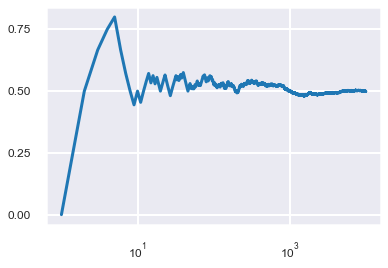

In [20]:
with sns.axes_style('darkgrid'):
    plt.plot(sequence_lengths, running_means)
    plt.xscale('log')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

This illustrates the Law of Large Numbers: LLN

Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them:

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**Note**: $ formats into formula

### Samples from a population:

* Result of each flip (N) = observation
* Replication of a sample of observations (M) = sample

Population of a size n >> N

We show the mean over the observations, or sample mean, for a sample of size 10, with 20 replications:

In [28]:
def make_throws(number_samples, sample_size):
    start=np.zeros((number_samples, sample_size), dtype=int)
    for i in range(number_samples):
        start[i,:]=coin_throw(sample_size)
    return np.mean(start, axis=1)

In [29]:
make_throws(number_samples=20, sample_size=10)

array([0.4, 0.6, 0.3, 0.6, 0.8, 0.8, 0.7, 0.6, 0.6, 0.3, 0.5, 0.5, 0.3,
       0.5, 0.6, 0.3, 0.6, 0.3, 0.8, 0.4])

In [30]:
print(np.zeros((20,10),dtype=int))

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [33]:
coin_throw(5)

array([0, 1, 0, 1, 0])

In [38]:
sample_sizes = np.arange(1,1001,1)
sample_means = [make_throws(number_samples=200, sample_size=i) for i in sample_sizes]

Lets formalize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

Imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the **law of large numbers**.

In [39]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

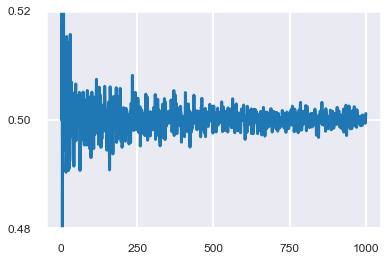

In [52]:
with sns.axes_style('darkgrid'):
    plt.plot(sample_sizes, mean_of_sample_means)
    plt.ylim([0.48,0.52])
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    # plt.xscale('log')

### Sampling Distribution:

Simply the extent to which we will get the same or different answers the next time. The important question becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**.

In [53]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

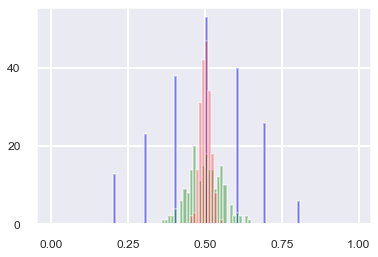

In [60]:
with sns.axes_style('darkgrid'):
    plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5, color = 'b');
    plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4, color = 'g');
    plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3, color = 'r');
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

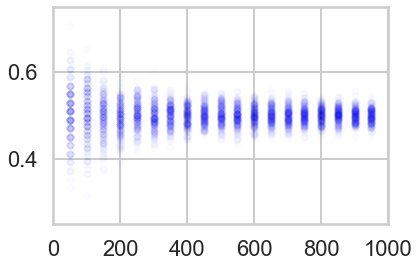

In [65]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000: # so only for the multiples of 50
        plt.scatter([i]*200, sample_means[i], alpha=0.01, color = 'b', s=40, marker='o');
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

### The variation in the sample mean:

De-Moivre's formula:
$$\begin{eqnarray*}
V(\bar{x}) = \frac{\sigma^2}{N}
\end{eqnarray*}$$

The sq root of V, or the std dev of the sampling distribution of the mean is called the **Standard Error**

We can obrain the st dev of the sampling distribution at different sample sizes and plot it against the size, to confirm the behaviour:

### Central Limit Theorem

The sample mean, or mean of the random variables $x_{mi}$ in the sample $m$, has a sampling distribution with mean $\mu$ and variance $\frac{\sigma^2}{N}$, as shown before. Now for large sample sizes we can go further and use the CLT theorem to say that this distribution is the normal distribution,

$$S_N \sim N(\mu, \frac{\sigma^2}{N})$$

In [82]:
def make_throws_var(number_samples, sample_size):
    start=np.zeros((number_samples, sample_size), dtype=int)
    for i in range(number_samples):
        start[i,:]=coin_throw(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

###### THIS TAKES A VERY LONG TIME

KeyboardInterrupt: 

# Application: Gallup Party Affiliation Poll 2012

We will try to predict the outcome of the election based the estimated proportion of people in each state who identify with one one political party or the other.

Gallup measures the political leaning of each state, based on asking random people which party they identify or affiliate with. Here's the data they collected from January-June of 2012:

In [78]:
gallup_2012 = pd.read_csv('2015lab3/g12.csv').set_index('State')
gallup_2012['Unknown'] = 100 - gallup_2012.Democrat - gallup_2012.Republican # arrays!
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


* Democrat = % of ind to self identify as democrat
* Republican = % of ind to self identify as republican
* Dem_Adv = the difference between the dem and rep %
* N = number of ind surveyed
* Unknown = the remainder of ind

Let's work out the Standard Error for each sample:

In [79]:
gallup_2012['Standard_Error'] = 100.0*np.sqrt((gallup_2012.Democrat/100.0)*((100.0-gallup_2012.Democrat)/100.0)/(gallup_2012.N-1))
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown,Standard_Error
State,,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4,0.849059
Alaska,35.9,44.3,-8.4,402,19.8,2.395543
Arizona,39.8,47.3,-7.5,4325,12.9,0.744384
Arkansas,41.5,40.8,0.7,2071,17.7,1.082971
California,48.3,34.6,13.7,16197,17.1,0.392658


In [81]:
print(gallup_2012['Standard_Error'].max())
print(gallup_2012['Standard_Error'].min())
print(gallup_2012['Standard_Error'].mean())

2.3955434516885057
0.39265845450190573
1.1142832871050148


We'll build the model in the function uncertain_gallup_model, and return a forecast where the probability of an Obama victory is given by the probability that a sample from the Dem_Adv Gaussian is positive.

To do this we simply need to find the area under the curve of a Gaussian that is on the positive side of the x-axis. The probability that a sample from a Gaussian with mean $\mu$ and standard deviation $\sigma$ exceeds a threhold $z$ can be found using the the Cumulative Distribution Function of a Gaussian:

$$
CDF(z) = \frac1{2}\left(1 + {\mathrm erf}\left(\frac{z - \mu}{\sqrt{2 \sigma^2}}\right)\right) 
$$

In [83]:
from scipy.special import erf
def uncertain_gallup_model(gallup):
    standard_error = 3 # just a conservative estimate
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2))) # as the hypothesis being tested here is that dem_adv is zero, we can leave this zero
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

NameError: name 'predictwise' is not defined